## Assignment: $k$ Means Clustering

## Nora Wiktorowicz

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

# **Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

**1.Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`**

In [1]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

**2.Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?**

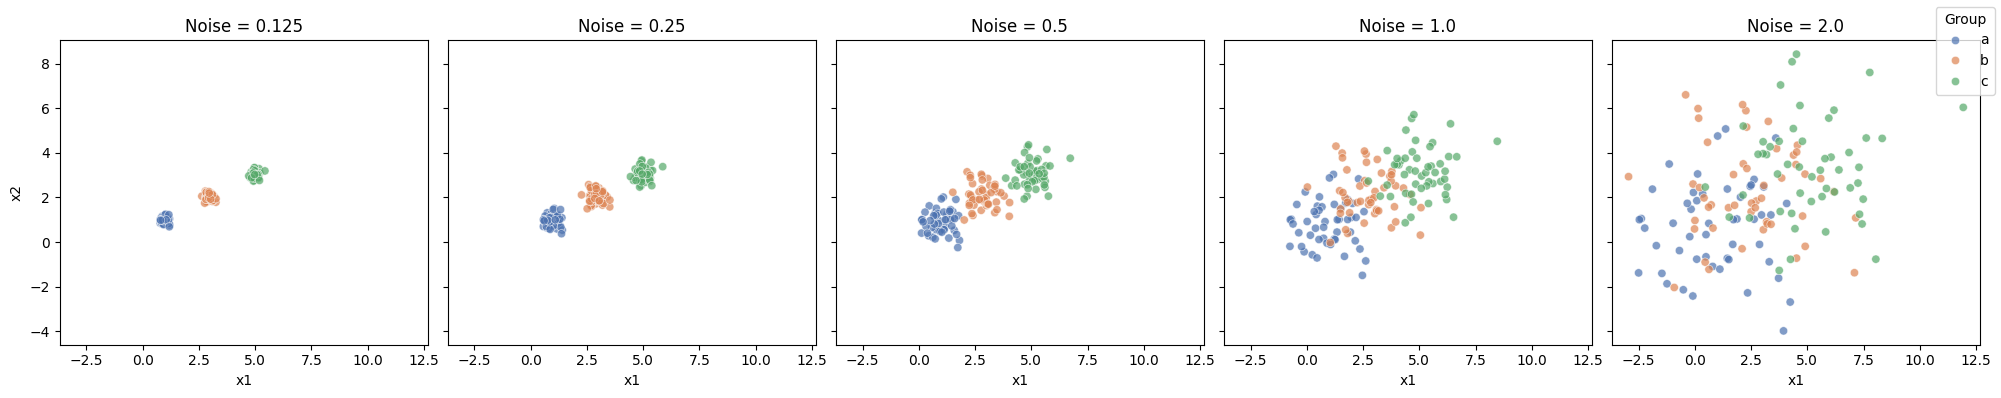

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

datasets = [(df0_125, "Noise = 0.125"),
            (df0_25, "Noise = 0.25"),
            (df0_5, "Noise = 0.5"),
            (df1_0, "Noise = 1.0"),
            (df2_0, "Noise = 2.0")]

fig, axes = plt.subplots(1, 5, figsize=(20, 4), sharex=True, sharey=True)
for ax, (df, title) in zip(axes, datasets):
    sns.scatterplot(x='x1', y='x2', hue='group', data=df, ax=ax, palette="deep", alpha=0.7)
    ax.set_title(title)
    ax.legend().remove()

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="upper right", title="Group")
plt.tight_layout()
plt.show()


As the noise increases from 0.125 to 2.0, the visual distinctness of the clusters decreases. The clusters no longer have clear defined borders, grouped closely together. They are more seperated and integrated, and it becomes harder to visualize patterns within where they lie on the x1 and x2 axis.

**3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)**

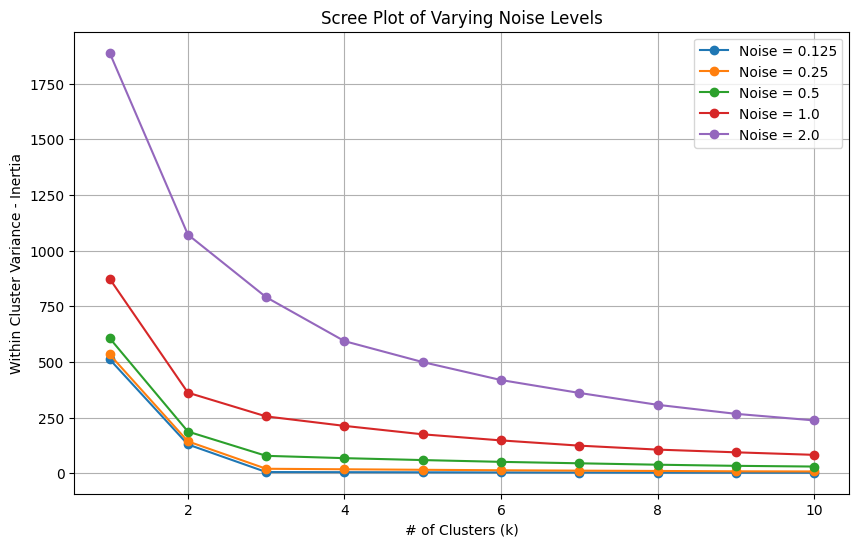

In [6]:
from sklearn.cluster import KMeans

def compute_inertia(df, max_k=10):
    X = df[['x1', 'x2']]
    inertias = []
    k_values = range(1, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    return k_values, inertias

datasets = [(df0_125, "Noise = 0.125"),
            (df0_25, "Noise = 0.25"),
            (df0_5, "Noise = 0.5"),
            (df1_0, "Noise = 1.0"),
            (df2_0, "Noise = 2.0")]


plt.figure(figsize=(10, 6))
for df, title in datasets:
    k_values, inertias = compute_inertia(df)
    plt.plot(k_values, inertias, marker='o', linestyle='-', label=title)

plt.xlabel("# of Clusters (k)")
plt.ylabel("Within Cluster Variance - Inertia")
plt.title("Scree Plot of Varying Noise Levels")
plt.legend()
plt.grid(True)
plt.show()


The scree plot shows that the inertia - sum of squared distances - decreases as the number of clusters (k) increases. The noise level affects the scree plot. As the noise level increases, the trend shifts upward, increasing the starting point of the sum of squared distance. As noise level increases, it becomes more difficult to definitively select a k. For example, with lower noise levels, there is a distinct elbow at k=3, making it easier to more definitively select a k. However, the shape of the elbow at noise level 2 is much more difficult to discern.

**4. Explain the intuition of the elbow, using this numerical simulation as an example.**

The elbow shows the optimal number of k by showing how inertia changes as the number of clusters increases. As the numbner of clisters increases, the inertia greatly decreases. However, at a certain point, it begins to level out. This point is known as the elbow, and is the optimal number of k. In this numerical simulation, we see that k=3 is the clear elbow when the noise level is 0.125, 0.25, or 0.5.

# **Q4.** This question is a case study for $k$ means clustering.


**1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.**

In [9]:
! git clone https://github.com/ds4e/wrangling

fatal: destination path 'wrangling' already exists and is not an empty directory.


In [11]:
airbnb = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv', low_memory = False)
airbnb.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [33]:
airbnb["Price"] = pd.to_numeric(airbnb["Price"], errors='coerce') #clean by converting to numeric
airbnb["Beds"] = pd.to_numeric(airbnb["Beds"], errors='coerce')
airbnb["Number Of Reviews"] = pd.to_numeric(airbnb["Number Of Reviews"], errors='coerce')
airbnb["Review Scores Rating"] = pd.to_numeric(airbnb["Review Scores Rating"], errors='coerce')
airbnb = airbnb.dropna(subset=["Price", "Beds", "Review Scores Rating"]) #drop where missing data
airbnb.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating,Cluster
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,0.1875,1,0.148438,0.544995,0.950,0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,0.0625,1,0.011719,0.140546,1.000,0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,0.0625,1,0.031250,0.242669,1.000,0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,0.0625,1,0.308594,0.080890,0.925,2
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,0.1250,1,0.367188,0.262892,0.875,2


**2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).**

In [19]:
from sklearn.preprocessing import MinMaxScaler
normalize_data = ["Price", "Beds", "Number Of Reviews", "Review Scores Rating"]
scaler = MinMaxScaler()
airbnb[normalize_data] = scaler.fit_transform(airbnb[normalize_data])
airbnb = airbnb.dropna() #drop any missing data
print(airbnb.head())


   Host Id Host Since                                 Name Neighbourhood   \
4      500  6/26/2008             Trendy Times Square Loft      Manhattan   
5     1039  7/25/2008   Big Greenpoint 1BD w/ Skyline View       Brooklyn   
6     1783  8/12/2008                         Amazing Also      Manhattan   
7     2078  8/15/2008  Colorful, quiet, & near the subway!       Brooklyn   
8     2339  8/20/2008  East Village Cocoon: 2 Bedroom Flat      Manhattan   

  Property Type  Review Scores Rating (bin)        Room Type  Zipcode    Beds  \
4     Apartment                        95.0     Private room  10036.0  0.1875   
5     Apartment                       100.0  Entire home/apt  11222.0  0.0625   
6     Apartment                       100.0  Entire home/apt  10004.0  0.0625   
7     Apartment                        90.0     Private room  11201.0  0.0625   
8     Apartment                        90.0  Entire home/apt  10009.0  0.1250   

   Number of Records  Number Of Reviews     Price 

**3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.**

In [21]:
from sklearn.cluster import KMeans
X = airbnb[["Beds", "Number Of Reviews", "Review Scores Rating"]]
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10) #k=6, as stated in instructions
airbnb["Cluster"] = kmeans.fit_predict(X)
print(airbnb[["Beds", "Number Of Reviews", "Review Scores Rating", "Cluster"]].head())


     Beds  Number Of Reviews  Review Scores Rating  Cluster
4  0.1875           0.148438                 0.950        2
5  0.0625           0.011719                 1.000        1
6  0.0625           0.031250                 1.000        1
7  0.0625           0.308594                 0.925        3
8  0.1250           0.367188                 0.875        3


**4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.**

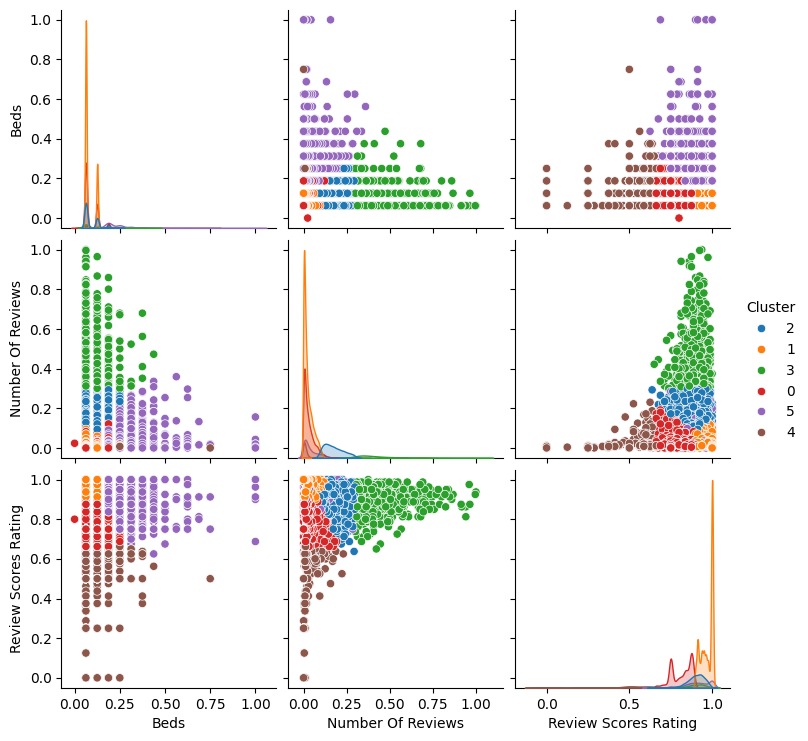

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
airbnb["Cluster"] = airbnb["Cluster"].astype(str)
sns.pairplot(airbnb, vars=["Beds", "Number Of Reviews", "Review Scores Rating"], hue="Cluster", diag_kind="kde")
plt.show()


**5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?**

In [26]:
price_summary = airbnb.groupby("Cluster")["Price"].describe()
print(price_summary)
highest_price_clusters = price_summary["mean"].sort_values(ascending=False)
print("\nClusters with Highest Average Rental Prices:")
print(highest_price_clusters)


           count      mean       std       min       25%       50%       75%  \
Cluster                                                                        
0         5544.0  0.122115  0.079286  0.010111  0.065723  0.102629  0.160768   
1        10203.0  0.137524  0.086958  0.000000  0.075834  0.120324  0.176946   
2         2945.0  0.132722  0.083061  0.012133  0.077856  0.116279  0.166835   
3          753.0  0.124219  0.084477  0.017189  0.070779  0.100101  0.156724   
4          666.0  0.119101  0.098287  0.015167  0.055612  0.089990  0.149646   
5         1848.0  0.260721  0.167071  0.016178  0.141557  0.217391  0.343782   

              max  
Cluster            
0        1.000000  
1        0.985844  
2        0.894843  
3        0.874621  
4        0.797776  
5        0.997978  

Clusters with Highest Average Rental Prices:
Cluster
5    0.260721
1    0.137524
2    0.132722
3    0.124219
0    0.122115
4    0.119101
Name: mean, dtype: float64


Cluster 5 has the highest average rental price, followed by clusters 1 and 2.


**6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.**

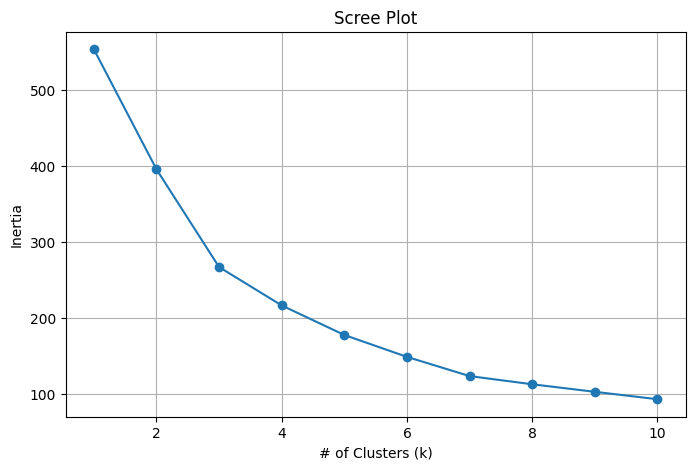

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_values = range(1, 11)
inertias = []
X = airbnb[["Beds", "Number Of Reviews", "Review Scores Rating"]]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.xlabel("# of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Scree Plot")
plt.grid()
plt.show()


The elbow method shows that the optimal k is k=4.

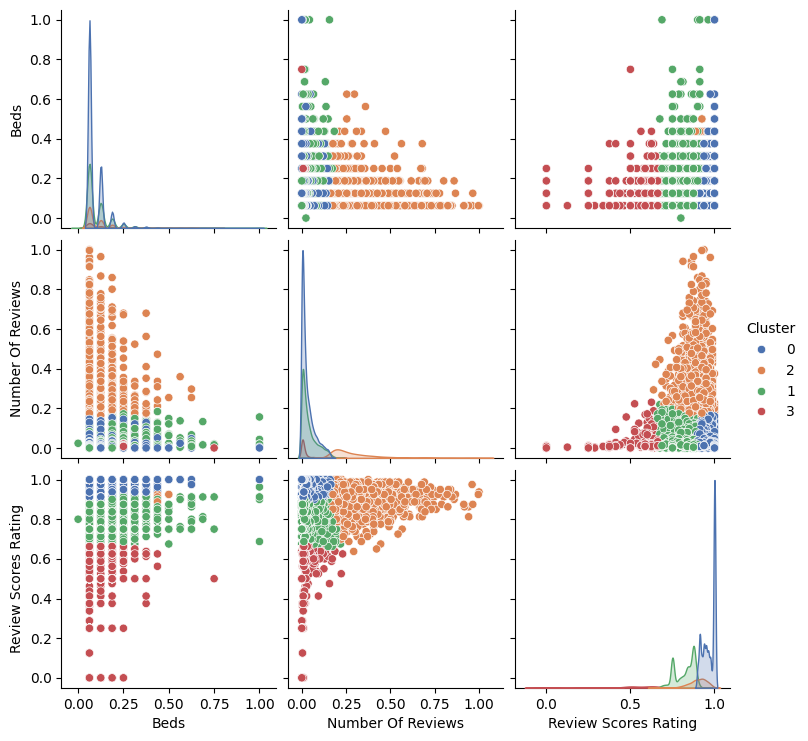

In [31]:
#repeat step 4
from sklearn.cluster import KMeans
X = airbnb[["Beds", "Number Of Reviews", "Review Scores Rating"]]
kmeans_optimal = KMeans(n_clusters=4, random_state=42, n_init=10)
airbnb["Cluster"] = kmeans_optimal.fit_predict(X)
airbnb["Cluster"] = airbnb["Cluster"].astype(str)
sns.pairplot(airbnb, vars=["Beds", "Number Of Reviews", "Review Scores Rating"], hue="Cluster", palette="deep", diag_kind="kde")
plt.show()



In [32]:
#repeat step 5
summary = airbnb.groupby("Cluster")["Price"].describe()
print(summary)
highest_price = summary["mean"].sort_values(ascending=False)
print("\nClusters with Highest Average Rental Prices:")
print(highest_price)



           count      mean       std       min       25%       50%       75%  \
Cluster                                                                        
0        12032.0  0.147795  0.102606  0.000000  0.079879  0.126390  0.187058   
1         6890.0  0.138617  0.102072  0.010111  0.070779  0.111223  0.176946   
2         2290.0  0.132656  0.089059  0.017189  0.075834  0.111223  0.166835   
3          747.0  0.118582  0.098565  0.015167  0.055612  0.089990  0.141557   

              max  
Cluster            
0        0.997978  
1        1.000000  
2        0.874621  
3        0.797776  

Clusters with Highest Average Rental Prices:
Cluster
0    0.147795
1    0.138617
2    0.132656
3    0.118582
Name: mean, dtype: float64


From repeating step 4 and 5 after finding our optimal k (k=4), we can see that the clusters with the highest average rental prices is now 0, followed by 1 and 2.